In [19]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.losses import categorical_crossentropy
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the input data to (28, 28, 1) and normalize it to range [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential()

# Add Conv2D layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% probability

# Output layer with softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6648 - loss: 0.9300 - val_accuracy: 0.8481 - val_loss: 0.4157
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8399 - loss: 0.4468 - val_accuracy: 0.8677 - val_loss: 0.3578
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8625 - loss: 0.3843 - val_accuracy: 0.8817 - val_loss: 0.3218
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8801 - loss: 0.3333 - val_accuracy: 0.8866 - val_loss: 0.3083
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8883 - loss: 0.3098 - val_accuracy: 0.8957 - val_loss: 0.2923
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.8965 - loss: 0.2920 - val_accuracy: 0.9003 - val_loss: 0.2768
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8984 - loss: 0.2798 - val_accuracy: 0.9029 - val_loss: 0.2662
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9046 - loss: 0.2596 - 

In [13]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.91


In [15]:
# Step 7: Make predictions for two images
sample_images = x_test[:2]
sample_labels = y_test[:2]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


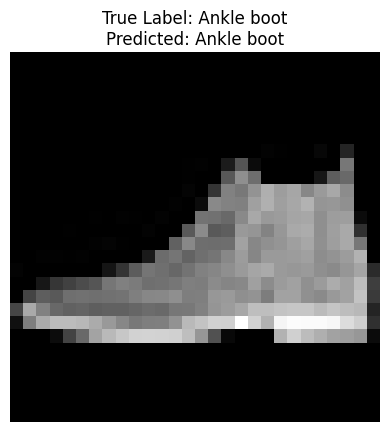

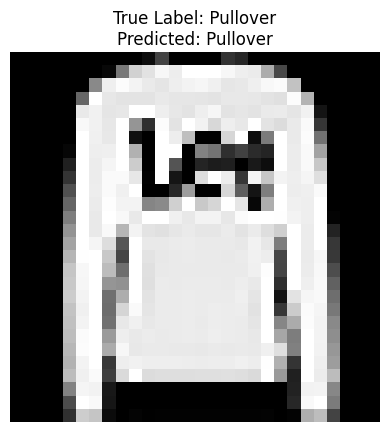

In [20]:
# Get predictions
predictions = model.predict(sample_images)

# Plot the results
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

for i, image in enumerate(sample_images):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {class_names[np.argmax(sample_labels[i])]}\n"
              f"Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
